In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  True
OS:  linux


In [2]:
#bss=[64,128,256,512,1024]
bss=[2048]
sch="plateau"
total_epochs=160
step=20

def train_plateau():
    for bs in bss:
        print("Training bs: " + str(bs))
        name="bs_"+str(bs) + "_sch_"+ sch
        save_folder=name+"/"+name

        net=models.resnet18(num_classes=10)
        criterion = nn.CrossEntropyLoss()
        # Observe that all parameters are being optimized
        optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
        # Decay LR by a factor of 0.1 every 7 epochs
        # exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
        plateau_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,threshold=1e-3)
        
        model_actions.progressive_train_4(net,epochs=total_epochs,step=step,tr_bs=bs,save_folder=save_folder,criterion=criterion,scheduler=plateau_lr_scheduler)

In [3]:
az_manage_proc.run_and_delete(log.log_time,train_plateau)

Found existing instance, use it.
Training bs: 2048
Training


Epoch: 1

Epoch: 2

Epoch: 3

Epoch: 4

Epoch: 5

Epoch: 6

Epoch: 7

Epoch: 8

Epoch: 9

Epoch: 10

Epoch: 11

Epoch: 12

Epoch: 13

Epoch: 14

Epoch: 15

Epoch: 16

Epoch: 17

Epoch: 18

Epoch: 19

Epoch: 20
Saving.. epoch: 20


Epoch: 21

Epoch: 22

Epoch: 23

Epoch: 24

Epoch: 25

Epoch: 26

Epoch: 27

Epoch: 28

Epoch: 29

Epoch: 30

Epoch: 31

Epoch: 32

Epoch: 33

Epoch: 34

Epoch: 35

Epoch: 36

Epoch: 37

Epoch: 38

Epoch: 39

Epoch: 40
Saving.. epoch: 40


Epoch: 41

Epoch: 42

Epoch: 43

Epoch: 44

Epoch: 45

Epoch: 46

Epoch: 47

Epoch: 48

Epoch: 49

Epoch: 50

Epoch: 51

Epoch: 52

Epoch: 53

Epoch: 54

Epoch: 55

Epoch: 56

Epoch: 57

Epoch: 58

Epoch: 59

Epoch: 60
Saving.. epoch: 60


Epoch: 61

Epoch: 62

Epoch: 63

Epoch: 64

Epoch: 65

Epoch: 66

Epoch: 67

Epoch: 68

Epoch: 69

Epoch: 70

Epoch: 71

Epoch: 72

Epoch: 73

Epoch: 74

Epoch: 75

Epoch: 76

Epoch: 77

Epoch: 78

Epoch: 79

Epoch: 80
Saving..

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Show Training graphs

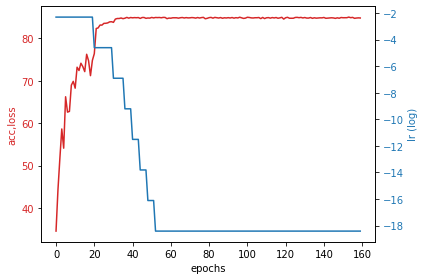

In [5]:

bs=256
loaded=utils.load("bs_"+str(bs)+"_sch_plateau.json")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('acc,loss', color=color)
ax1.plot(loaded["test_acc_v"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('lr (log)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.log(loaded["current_lr_v"]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
bs=256
loaded=utils.load("bs_"+str(bs)+"_sch_plateau.json")